In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Cleaned Data with States.csv')
df.head()

,Unnamed: 0,Alcohol,Appellation,Category,Points,Price,Review,Wine,Winery,Year,Variety,State
0,0,14.9,"Russian River Valley, Sonoma, California, US",Red,87,42.00,"Baked plum, licorice and lavender aromas and f...",V. Sattui 2015 Gilsson Vineyard Old Vine Zinfa...,V. Sattui,2015.0,Zinfandel,California
1,1,14.5,"Central Coast, Central Coast, California, US",Red,87,19.98,Pomegranate and light baking-spice aromas show...,Wente 2014 Coastal Selection Pinot Noir (Centr...,Wente,2014.0,Pinot Noir,California
2,2,13.8,California Republic,Red,86,15.00,Butter and vanilla notes dominate the jammy fr...,California Republic 2016 Cabernet Sauvignon (C...,California Republic,2016.0,Cabernet Sauvignon,California
3,3,13.8,"Lodi, Central Valley, California, US",Red,86,10.00,An aroma like toasted almonds and wood smoke m...,Collier Creek 2015 Red Wagon Pinot Noir (Lodi),Collier Creek,2015.0,Pinot Noir,California
4,4,13.0,"New Jersey, US",Red,86,27.00,Plum skin and pomegranate lead the nose while ...,DiLuca 2016 Rosso Black Label Red,DiLuca,2016.0,Red Blend,NaN


In [3]:
df = df.drop(columns=['Unnamed: 0','Review','Wine'])

In [4]:
len(df)

4768

In [ ]:
df.Variety.describe()

count           4768
unique           117
top       Pinot Noir
freq            1058
Name: Variety, dtype: object

In [ ]:
df = df.dropna()

In [ ]:

df.isna().sum()

Alcohol        0
Appellation    0
Category       0
Points         0
Price          0
Winery         0
Year           0
Variety        0
State          0
dtype: int64

In [ ]:
df.describe(include= 'all')

,Alcohol,Appellation,Category,Points,Price,Winery,Year,Variety,State
count,3392.000000,3392,3392,3392.000000,3392.000000,3392,3392.000000,3392,3392
unique,NaN,157,7,NaN,NaN,1138,NaN,88,4
top,NaN,"Russian River Valley, Sonoma, California, US",Red,NaN,NaN,Hartford Court,NaN,Pinot Noir,California
freq,NaN,214,2290,NaN,NaN,27,NaN,865,2209
mean,13.987689,NaN,NaN,89.727594,46.435018,NaN,2015.354363,NaN,NaN
std,0.970646,NaN,NaN,2.767949,35.128579,NaN,1.187030,NaN,NaN
min,8.200000,NaN,NaN,81.000000,5.000000,NaN,2004.000000,NaN,NaN
25%,13.500000,NaN,NaN,88.000000,26.000000,NaN,2015.000000,NaN,NaN
50%,14.200000,NaN,NaN,90.000000,40.000000,NaN,2015.000000,NaN,NaN
75%,14.500000,NaN,NaN,92.000000,55.000000,NaN,2016.000000,NaN,NaN


In [ ]:
df.columns

Index(['Alcohol', 'Appellation', 'Category', 'Points', 'Price', 'Winery',
       'Year', 'Variety', 'State'],
      dtype='object')

In [ ]:
one_hot_df = pd.get_dummies(df, columns=['Year', 'Category','State','Appellation', 'Winery',])
one_hot_df.head()

,Alcohol,Points,Price,Variety,Year_2004.0,Year_2005.0,Year_2007.0,Year_2008.0,Year_2009.0,Year_2010.0,...,Winery_Z. Alexander Brown,Winery_ZD,Winery_Zaca Mesa,Winery_Zanoli,Winery_Zeitgeist,Winery_Zinfandelic,Winery_Zotovich,Winery_van Loben Sels,Winery_Écluse,Winery_Órale
0,14.9,87,42.00,Zinfandel,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.5,87,19.98,Pinot Noir,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.8,86,15.00,Cabernet Sauvignon,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.8,86,10.00,Pinot Noir,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14.7,86,65.00,Pinot Noir,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels = one_hot_df.Variety
one_hot_df.drop('Variety', axis=1, inplace=True)
one_hot_df.head()

,Alcohol,Points,Price,Year_2004.0,Year_2005.0,Year_2007.0,Year_2008.0,Year_2009.0,Year_2010.0,Year_2011.0,...,Winery_Z. Alexander Brown,Winery_ZD,Winery_Zaca Mesa,Winery_Zanoli,Winery_Zeitgeist,Winery_Zinfandelic,Winery_Zotovich,Winery_van Loben Sels,Winery_Écluse,Winery_Órale
0,14.9,87,42.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.5,87,19.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.8,86,15.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.8,86,10.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14.7,86,65.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#* Use the scaler's `.fit_transform()` method to create a scaled version of our dataset. 
scaled_data = scaler.fit_transform(one_hot_df)
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_df.columns)
scaled_df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcohol,Points,Price,Year_2004.0,Year_2005.0,Year_2007.0,Year_2008.0,Year_2009.0,Year_2010.0,Year_2011.0,...,Winery_Z. Alexander Brown,Winery_ZD,Winery_Zaca Mesa,Winery_Zanoli,Winery_Zeitgeist,Winery_Zinfandelic,Winery_Zotovich,Winery_van Loben Sels,Winery_Écluse,Winery_Órale
0,0.940040,-0.985566,-0.126270,-0.024289,-0.024289,-0.024289,-0.024289,-0.029753,-0.024289,-0.057039,...,-0.017173,-0.017173,-0.045475,-0.017173,-0.017173,-0.017173,-0.042095,-0.024289,-0.038422,-0.024289
1,0.527883,-0.985566,-0.753202,-0.024289,-0.024289,-0.024289,-0.024289,-0.029753,-0.024289,-0.057039,...,-0.017173,-0.017173,-0.045475,-0.017173,-0.017173,-0.017173,-0.042095,-0.024289,-0.038422,-0.024289
2,-0.193393,-1.346897,-0.894988,-0.024289,-0.024289,-0.024289,-0.024289,-0.029753,-0.024289,-0.057039,...,-0.017173,-0.017173,-0.045475,-0.017173,-0.017173,-0.017173,-0.042095,-0.024289,-0.038422,-0.024289
3,-0.193393,-1.346897,-1.037343,-0.024289,-0.024289,-0.024289,-0.024289,-0.029753,-0.024289,-0.057039,...,-0.017173,-0.017173,-0.045475,-0.017173,-0.017173,-0.017173,-0.042095,-0.024289,-0.038422,-0.024289
4,0.733961,-1.346897,0.528564,-0.024289,-0.024289,-0.024289,-0.024289,-0.029753,-0.024289,-0.057039,...,-0.017173,-0.017173,-0.045475,-0.017173,-0.017173,-0.017173,-0.042095,-0.024289,-0.038422,-0.024289


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.2)

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_135_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(X_train.columns))
features_135_train.head()

,Alcohol,Points,Price,Year_2004.0,Year_2005.0,Year_2007.0,Year_2008.0,Year_2009.0,Year_2010.0,Year_2011.0,...,Winery_Zotovich^2,Winery_Zotovich Winery_van Loben Sels,Winery_Zotovich Winery_Écluse,Winery_Zotovich Winery_Órale,Winery_van Loben Sels^2,Winery_van Loben Sels Winery_Écluse,Winery_van Loben Sels Winery_Órale,Winery_Écluse^2,Winery_Écluse Winery_Órale,Winery_Órale^2
0,14.4,87.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.5,88.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.5,92.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.7,87.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,90.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.6)

def variance_threshold_selector(data, threshold=0.6):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

features_selected_train = variance_threshold_selector(features_135_train)

features_selected_train.head()

,Alcohol,Points,Price,Alcohol^2,Alcohol Points,Alcohol Price,Alcohol Year_2011.0,Alcohol Year_2012.0,Alcohol Year_2013.0,Alcohol Year_2014.0,...,Price Winery_Works and Days,Price Winery_Wrath,Price Winery_Youngberg Hill Vineyards,Price Winery_ZD,Price Winery_Zaca Mesa,Price Winery_Zanoli,Price Winery_Zotovich,Price Winery_van Loben Sels,Price Winery_Écluse,Price Winery_Órale
0,14.4,87.0,55.0,207.36,1252.8,792.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.5,88.0,32.0,210.25,1276.0,464.0,0.0,0.0,0.0,14.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.5,92.0,40.0,210.25,1334.0,580.0,0.0,0.0,14.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.7,87.0,60.0,216.09,1278.9,882.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,90.0,70.0,225.00,1350.0,1050.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


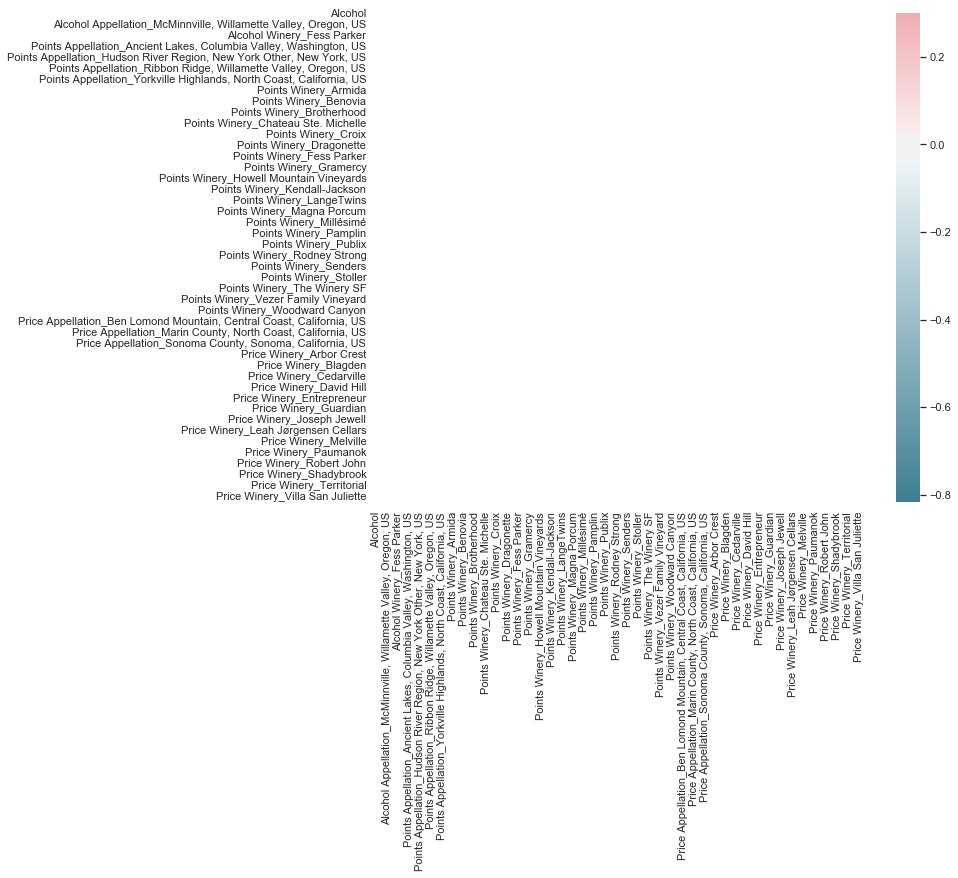

In [ ]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [ ]:
#  Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
def calculate_cols_to_drop(upper):
    #to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    shape = upper.shape
    print(shape)
    row_index = upper.index
    col_index = upper.columns
    to_drop = []
    
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            #print(upper.iloc[row,col])
            if upper.iloc[row, col] > 0.95:
                if row_index[row] in to_drop or col_index[col] in to_drop:
                    pass
                else:
                    to_drop.append(col_index[col])
    
    temp = upper.drop(index= to_drop, columns=to_drop)
    
    print(len(to_drop))
    
    shape = temp.shape
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            if temp.iloc[row, col] > 0.95:
                print("It did not work")
                print('row: ' + temp.index[row])
                print('col: ' + temp.columns[col])
            
    return to_drop

corr_removed = calculate_cols_to_drop(upper)

print(len([column for column in upper.columns if any(upper[column] > 0.95)]))
corr_removed


In [ ]:
upper